Expectation: A working solution where the learned class label using Neural Networks is similar (for most possible points) to the training class label. Also show the decision boundary.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)

    plt.show()

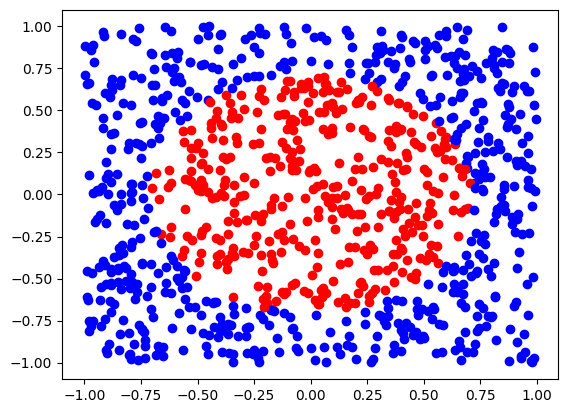

(2, 1000)
(1, 1000)


In [3]:
num_data=1000 # data points per class

X=np.random.uniform(-1,1,[2,num_data])
y=X[0,:]**2+X[1,:]**2-0.5>0
y=(y[None,:]).astype(np.int8)
plotClass(X,y,'o')
print(X.shape)
print(y.shape)

In [4]:
def sigmoid(z):
  return 1/(1+np.exp(-z))


def get_loss(yhat,  y):
  return np.sum(-y*np.log(yhat)- (1-y)*np.log(1-yhat) , axis = 1)



In [5]:
print(X.shape, y.shape)

(2, 1000) (1, 1000)


In [6]:
nh1 = 10 # neurons in hidden layers
nh2 = 5
ni = X.shape[0] # number of input features
no = y.shape[0] # number of output neurons

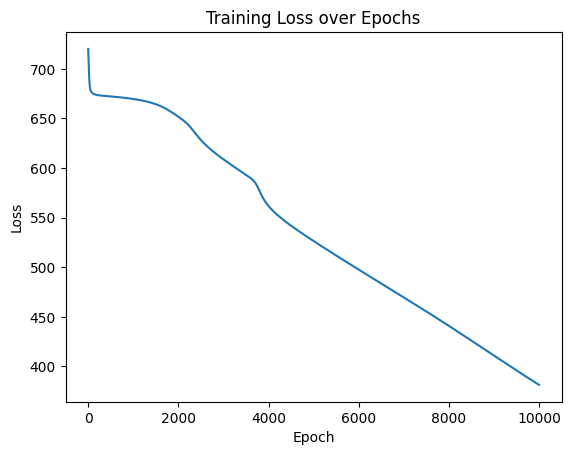

In [7]:
# Initialisation
W1 = np.random.randn(nh1,ni) # weight matrix
b1 = np.random.randn(nh1,1) # bias vectors

W2 = np.random.randn(nh2,nh1)
b2 = np.random.randn(nh2,1)

W3 = np.random.randn(no,nh2)
b3 = np.random.randn(no,1)

lr = 0.004
num_epochs = 10000
ls = []
for i in range(num_epochs):
  # TODOs: forward pass
  Z1 = W1 @ X + b1 # linear combination of inputs and weights plus biases
  A1 = sigmoid(Z1) # activations

  Z2 = W2 @ A1 + b2
  A2 = sigmoid(Z2)

  Z3 = W3 @ A2 + b3
  A3 = sigmoid(Z3) # output of the network

  loss = get_loss(A3, y)

  # TODOs: backward pass
  dZ3 = A3 - y # gradients of the loss wrt the linear combinations
  dW3 = dZ3 @ A2.T / X.shape[1] # gradients of the loss wrt the weights
  db3 = np.sum(dZ3, axis=1, keepdims=True) / X.shape[1] # gradients of loss wrt to biases

  dZ2 = W3.T @ dZ3 * A2 * (1 - A2)
  dW2 = dZ2 @ A1.T / X.shape[1]
  db2 = np.sum(dZ2, axis=1, keepdims=True) / X.shape[1]

  dZ1 = W2.T @ dZ2 * A1*(1-A1)
  dW1 = dZ1 @ X.T
  db1 = np.sum(dZ1, axis = 1, keepdims = True)

  # Optimisation (gradient descent)
  W3 -= lr*dW3
  b3 -= lr*db3
  W2 -= lr*dW2
  b2 -= lr*db2
  W1 -= lr*dW1
  b1 -= lr*db1

  ls.append(loss)

plt.plot(ls)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

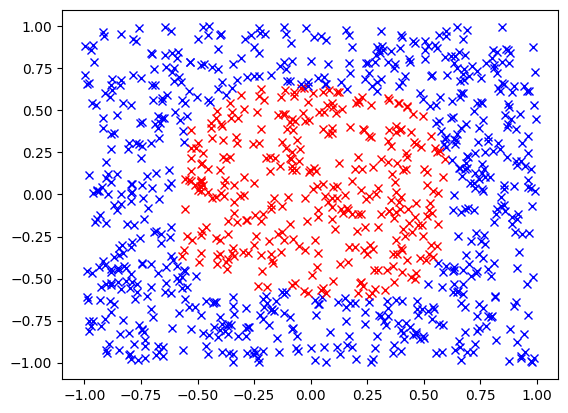

In [8]:
plotClass(X,A3>0.5,'x')